In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd 
from IPython.display import Image, HTML 
import os 

In [2]:
image_dir = 'archive/images/'
df = pd.read_csv('archive/pokedex.csv')

# Atualizar o DataFrame com o caminho correto das imagens
df['Image'] = df['Image'].apply(lambda x: os.path.join(image_dir, os.path.basename(x)))

# Função para converter o caminho das imagens em HTML para exibição
def path_to_image_html(path):
    return f'<img src="{path}" width="60" >'

# Aplicar a função para converter os caminhos em HTML
df['Image'] = df['Image'].apply(path_to_image_html)

# Usar o Styler do pandas para renderizar a tabela com HTML
df_styled = df.style.format({'Image': lambda x: x}).set_table_styles([
    {'selector': 'tr:hover', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'th', 'props': [('background-color', '#404040'), ('color', 'white')]}
])
#df_styled

In [3]:
#Filtro de tipos 1 pokedex 
filtro_tipo1 = df[df['Type 1'] == 'Electric']

filtro_tipo1_styled = filtro_tipo1.style.format({"Image": lambda x: x})
#filtro_tipo1_styled

In [4]:
#Sort de valores 
df_sorted = df.sort_values(by = 'Attack', ascending = False)
df_sorted_style = df_sorted.style.format({"Image": lambda x: x})

#df_sorted_style

In [ ]:
#Busca por pokemon específico
user_request = input('Type a pokémon name: ')

#result = df[df['Name'].str.contains(user_request)]
result = df[df['Name'].str.contains(user_request)]
result_styled = result.style.format({"Image": lambda x: x})

result_styled

Type 1
Water       150
Normal      134
Grass       113
Bug          91
Psychic      82
Fire         76
Electric     74
Rock         68
Dark         56
Fighting     50
Poison       49
Dragon       49
Ghost        47
Ground       47
Steel        45
Ice          43
Fairy        31
Flying       10
Name: count, dtype: int64


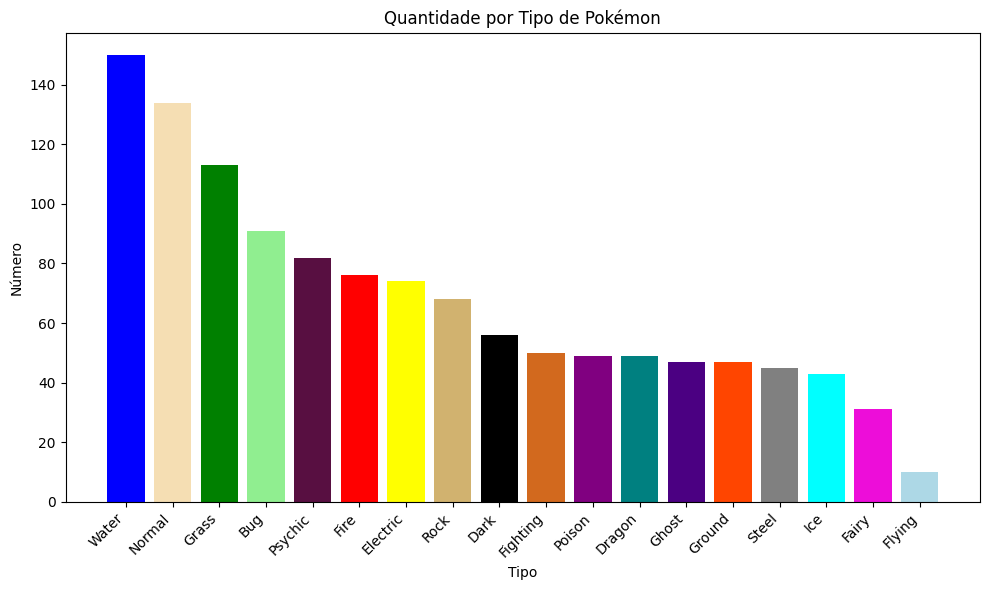

In [59]:
tipo1_pokemon_contagem = df['Type 1'].value_counts()
print(tipo1_pokemon_contagem)

cores_tipos = {
    'Grass' : 'green',
    'Fire' : 'red',
    'Normal': 'wheat',
    'Water': 'blue',
    'Bug' : 'lightgreen',     
    'Psychic': '#580F41',
    'Electric': 'yellow',
    'Rock': '#D1B26F',     
    'Dark': 'black',         
    'Fighting': '#D2691E',   
    'Poison': 'purple',      
    'Dragon': '#008080',     
    'Ghost': '#4B0082',       
    'Ground': 'orangered',      
    'Steel': 'grey',       
    'Ice': 'cyan',         
    'Fairy': '#ED0DD9',       
    'Flying': 'lightblue'       
}
cores = [cores_tipos[tipo] for tipo in tipo1_pokemon_contagem.index]

plt.figure(figsize=(10, 6))
plt.bar(tipo1_pokemon_contagem.index, tipo1_pokemon_contagem.values, color=cores)
plt.title('Quantidade por Tipo de Pokémon')
plt.xlabel('Tipo')
plt.ylabel('Número')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#todos os pokémons base 
todos_base = df.drop_duplicates(subset="Index", keep='first')

todos_base_styled = todos_base.style.format({"Image": lambda x: x})
todos_base_styled 

In [ ]:
#Quantidade por tipo com os pokémons base
tipo1_pokemon_contagem_base = todos_base['Type 1'].value_counts()
print(tipo1_pokemon_contagem_base)

cores_tipos = {
    'Grass' : 'green',
    'Fire' : 'red',
    'Normal': 'wheat',
    'Water': 'blue',
    'Bug' : 'lightgreen',     
    'Psychic': '#580F41',
    'Electric': 'yellow',
    'Rock': '#D1B26F',     
    'Dark': 'black',         
    'Fighting': '#D2691E',   
    'Poison': 'purple',      
    'Dragon': '#008080',     
    'Ghost': '#4B0082',       
    'Ground': 'orangered',      
    'Steel': 'grey',       
    'Ice': 'cyan',         
    'Fairy': '#ED0DD9',       
    'Flying': 'lightblue'       
}
cores = [cores_tipos[tipo] for tipo in tipo1_pokemon_contagem_base.index]

plt.figure(figsize=(10, 6))
plt.bar(tipo1_pokemon_contagem_base.index, tipo1_pokemon_contagem_base.values, color=cores)
plt.title('Quantidade por Tipo de Pokémon')
plt.xlabel('Tipo')
plt.ylabel('Número')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

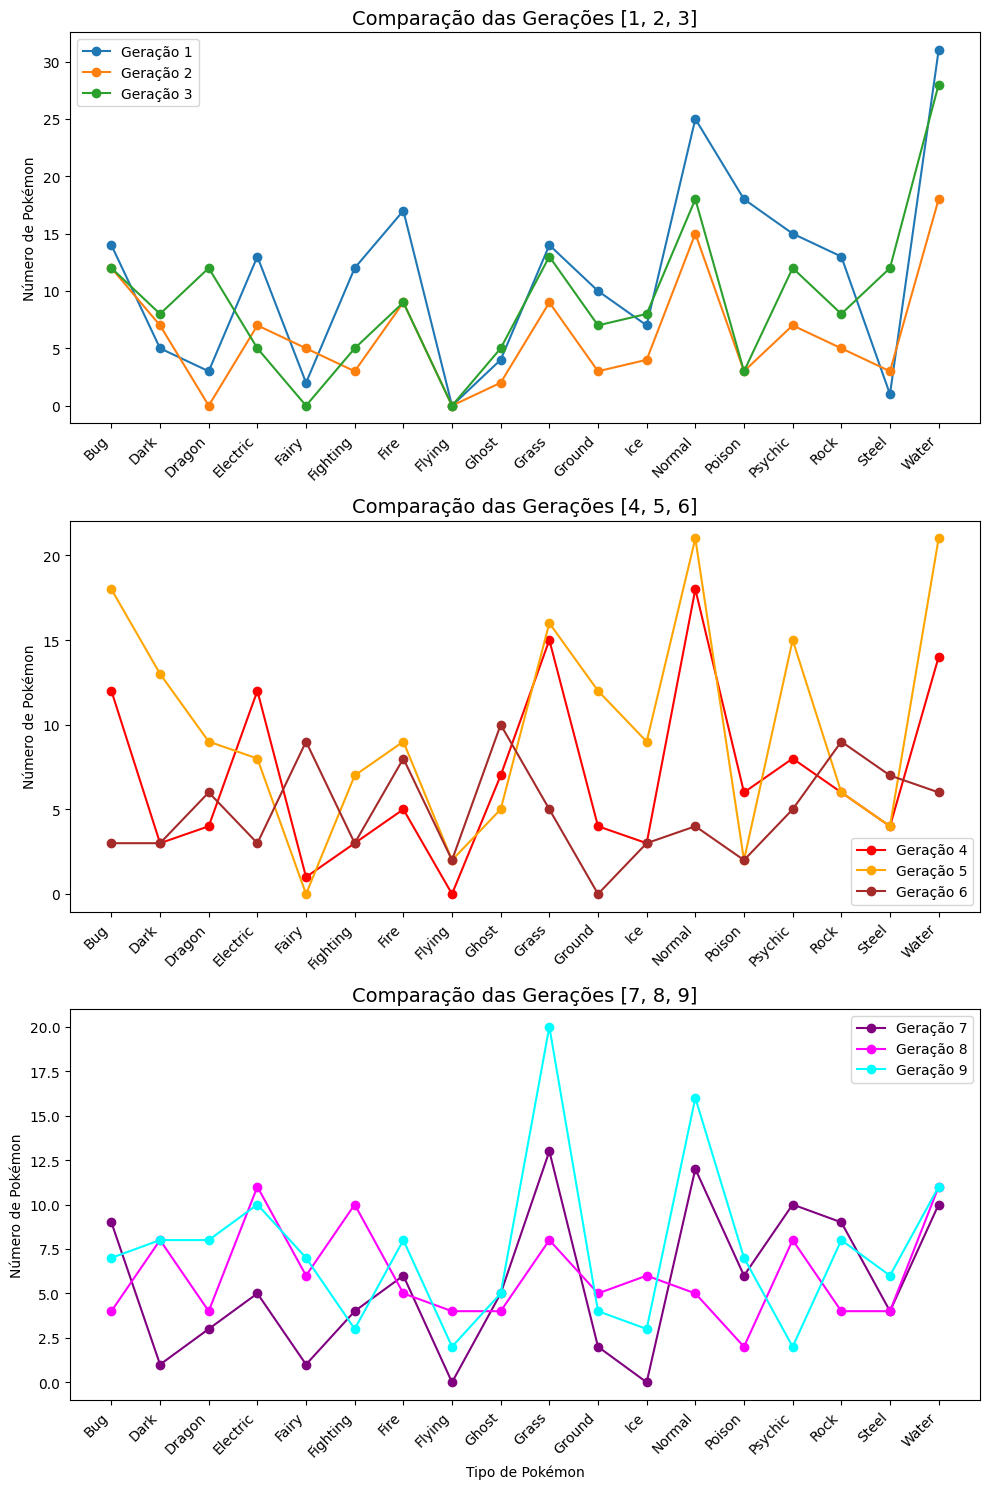

In [57]:
def get_generation(index):
    if 1 <= index <= 151:
        return 1
    elif 152 <= index <= 251:
        return 2
    elif 252 <= index <= 386:
        return 3
    elif 387 <= index <= 493:
        return 4
    elif 494 <= index <= 649:
        return 5
    elif 650 <= index <= 721:
        return 6
    elif 722 <= index <= 809:
        return 7
    elif 810 <= index <= 905:
        return 8
    else:
        return 9

df['Generation'] = df['Index'].apply(get_generation)

#Agrupar os dados por geração
contagem_tipo_geracao = df.groupby(['Generation', 'Type 1']).size().unstack(fill_value = 0)

# Listar as gerações disponíveis no DataFrame
geracoes = contagem_tipo_geracao.index.tolist()
# Criar subplots, com 3 gerações por gráfico
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
# Plotar 3 gerações por gráfico
# Definir as cores para cada gráfico
cores_geracao_2 = ['red', 'orange', 'brown']  # Cores para o 2º gráfico
cores_geracao_3 = ['purple', 'magenta', 'cyan']  # Cores para o 3º gráfico

# Plotar 3 gerações por gráfico
for i in range(3):
    gerações_grupo = geracoes[i*3:(i+1)*3]  # Pega 3 gerações de cada vez
    for j, generation in enumerate(gerações_grupo):
        if i == 1:
            axes[i].plot(contagem_tipo_geracao.columns, contagem_tipo_geracao.loc[generation], 
                         label=f'Geração {generation}', color=cores_geracao_2[j], marker='o')
        elif i == 2:
            axes[i].plot(contagem_tipo_geracao.columns, contagem_tipo_geracao.loc[generation], 
                         label=f'Geração {generation}', color=cores_geracao_3[j], marker='o')
        else:
            axes[i].plot(contagem_tipo_geracao.columns, contagem_tipo_geracao.loc[generation], 
                         label=f'Geração {generation}', marker='o')
    
    axes[i].set_title(f'Comparação das Gerações {gerações_grupo}', fontsize=14)
    axes[i].set_ylabel('Número de Pokémon')
    axes[i].legend()

    # Adicionar rótulos do eixo X para todos os gráficos
    axes[i].set_xticks(range(len(contagem_tipo_geracao.columns)))
    axes[i].set_xticklabels(contagem_tipo_geracao.columns, rotation=45, ha='right')


plt.xlabel('Tipo de Pokémon')
plt.tight_layout()
plt.show()